In [11]:
import pandas as pd
import numpy as np
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


In [12]:
series = pd.read_csv('sine-wave.csv', header = None)


In [13]:
series.head()


,0
0,0.841471
1,0.873736
2,0.902554
3,0.927809
4,0.949402


In [14]:
series.shape


(5001, 1)

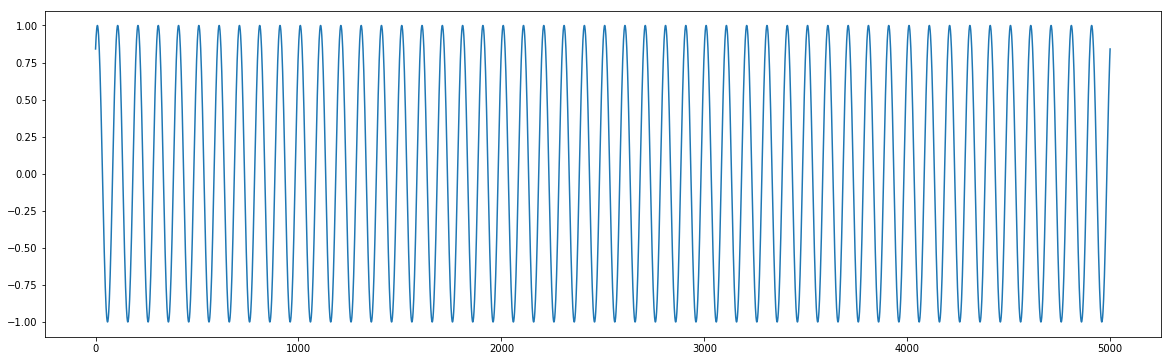

In [15]:
pyplot.figure(figsize=(20,6))
pyplot.plot(series.values)
pyplot.show()


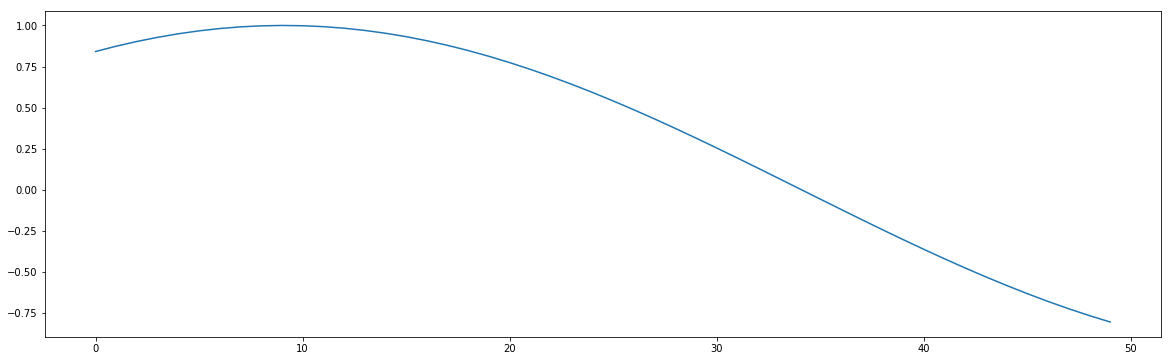

In [16]:
pyplot.figure(figsize=(20,6))
pyplot.plot(series.values[:50])


In [19]:
#normalize features

scaler = MinMaxScaler(feature_range=(-1,1))
scaled = scaler.fit_transform(series.values)
series = pd.DataFrame(scaled)


In [20]:
window_size = 50
series_s = series.copy()

for i in range(window_size):
    series = pd.concat([series, series_s.shift(-(i+1))], axis = 1)

series.dropna(axis=0, inplace=True)

In [21]:
series.head()

,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.841483,0.873749,0.902566,0.927822,0.949416,0.967263,0.981292,0.991449,0.997693,1.000000,0.998360,0.992780,0.983282,0.969904,0.952697,0.931731,0.907088,0.878865,0.847173,0.812138,0.773898,0.732603,0.688418,0.641515,0.592081,0.540310,0.486407,0.430584,0.373061,0.314067,0.253833,0.192597,0.130601,0.068090,0.005310,-0.057491,-0.120065,-0.182166,-0.243547,-0.303967,-0.363188,-0.420975,-0.477101,-0.531344,-0.583490,-0.633333,-0.680677,-0.725334,-0.767129,-0.805896,-0.841483
1,0.873749,0.902566,0.927822,0.949416,0.967263,0.981292,0.991449,0.997693,1.000000,0.998360,0.992780,0.983282,0.969904,0.952697,0.931731,0.907088,0.878865,0.847173,0.812138,0.773898,0.732603,0.688418,0.641515,0.592081,0.540310,0.486407,0.430584,0.373061,0.314067,0.253833,0.192597,0.130601,0.068090,0.005310,-0.057491,-0.120065,-0.182166,-0.243547,-0.303967,-0.363188,-0.420975,-0.477101,-0.531344,-0.583490,-0.633333,-0.680677,-0.725334,-0.767129,-0.805896,-0.841483,-0.873749
2,0.902566,0.927822,0.949416,0.967263,0.981292,0.991449,0.997693,1.000000,0.998360,0.992780,0.983282,0.969904,0.952697,0.931731,0.907088,0.878865,0.847173,0.812138,0.773898,0.732603,0.688418,0.641515,0.592081,0.540310,0.486407,0.430584,0.373061,0.314067,0.253833,0.192597,0.130601,0.068090,0.005310,-0.057491,-0.120065,-0.182166,-0.243547,-0.303967,-0.363188,-0.420975,-0.477101,-0.531344,-0.583490,-0.633333,-0.680677,-0.725334,-0.767129,-0.805896,-0.841483,-0.873749,-0.902566
3,0.927822,0.949416,0.967263,0.981292,0.991449,0.997693,1.000000,0.998360,0.992780,0.983282,0.969904,0.952697,0.931731,0.907088,0.878865,0.847173,0.812138,0.773898,0.732603,0.688418,0.641515,0.592081,0.540310,0.486407,0.430584,0.373061,0.314067,0.253833,0.192597,0.130601,0.068090,0.005310,-0.057491,-0.120065,-0.182166,-0.243547,-0.303967,-0.363188,-0.420975,-0.477101,-0.531344,-0.583490,-0.633333,-0.680677,-0.725334,-0.767129,-0.805896,-0.841483,-0.873749,-0.902566,-0.927822
4,0.949416,0.967263,0.981292,0.991449,0.997693,1.000000,0.998360,0.992780,0.983282,0.969904,0.952697,0.931731,0.907088,0.878865,0.847173,0.812138,0.773898,0.732603,0.688418,0.641515,0.592081,0.540310,0.486407,0.430584,0.373061,0.314067,0.253833,0.192597,0.130601,0.068090,0.005310,-0.057491,-0.120065,-0.182166,-0.243547,-0.303967,-0.363188,-0.420975,-0.477101,-0.531344,-0.583490,-0.633333,-0.680677,-0.725334,-0.767129,-0.805896,-0.841483,-0.873749,-0.902566,-0.927822,-0.949416


In [22]:
series.shape

(4951, 51)

In [23]:
nrow = round(0.8*series.shape[0])

In [26]:
train = series.iloc[:nrow, :]
test = series.iloc[nrow:, :]

In [27]:
from sklearn.utils import shuffle
train = shuffle(train)

In [28]:
train_X = train.iloc[:,:-1]
train_y = train.iloc[:,-1]
test_X = test.iloc[:,:-1]
test_y = test.iloc[:,-1]


In [29]:
train_X = train_X.values
train_y = train_y.values
test_X = test_X.values
test_y = test_y.values

In [32]:
train_X.shape
train_y.shape
test_X.shape
test_y.shape

(990,)

In [33]:
# Define the LSTM model

model = Sequential()
model.add(LSTM(input_shape = (50, 1), output_dim= 50, return_sequences= True))
model.add(Dropout(0.5))
model.add(LSTM(256))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss="mse", optimizer="adam")
model.summary()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(input_shape=(50, 1), return_sequences=True, units=50)`
  after removing the cwd from sys.path.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               314368    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 325,025
Trainable params: 325,025
Non-trainable params: 0
_________________________________________________________________


In [36]:
start = time.time()
model.fit(train_X,train_y,batch_size=512,nb_epoch=3,validation_split=0.1)
print("> Compilation Time : ", time.time() - start)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


ValueError: Error when checking input: expected lstm_1_input to have 3 dimensions, but got array with shape (3961, 50)